<a href="https://colab.research.google.com/github/kpapdac/ml_projects/blob/master/GaussianHMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 217 kB 4.3 MB/s 


In [2]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from scipy.stats import poisson

np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                             [0.3, 0.5, 0.2],
                             [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, 1.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

In [3]:
# earthquake data from http://earthquake.usgs.gov/
earthquakes = np.array([
    13, 14, 8, 10, 16, 26, 32, 27, 18, 32, 36, 24, 22, 23, 22, 18,
    25, 21, 21, 14, 8, 11, 14, 23, 18, 17, 19, 20, 22, 19, 13, 26,
    13, 14, 22, 24, 21, 22, 26, 21, 23, 24, 27, 41, 31, 27, 35, 26,
    28, 36, 39, 21, 17, 22, 17, 19, 15, 34, 10, 15, 22, 18, 15, 20,
    15, 22, 19, 16, 30, 27, 29, 23, 20, 16, 21, 21, 25, 16, 18, 15,
    18, 14, 10, 15, 8, 15, 6, 11, 8, 7, 18, 16, 13, 12, 13, 20,
    15, 16, 12, 18, 15, 16, 13, 15, 16, 11, 11])

In [4]:
scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
                               n_iter=10)
        model.fit(earthquakes[:, None])
        models.append(model)
        scores.append(model.score(earthquakes[:, None]))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(earthquakes[:, None])

Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -391.9189281654951
Converged: True		Score: -341.89397049875356
Converged: True		Score: -341.88244772721345
Converged: True		Score: -342.1445482378539
Converged: True		Score: -341.8929674859702
Converged: True		Score: -341.88555381993297
Converged: True		Score: -342.28762276127696
Converged: True		Score: -342.53692921035895
Converged: True		Score: -341.88750207762115
Converged: True		Score: -341.8789363379968
Converged: True		Score: -342.9703881743695
Converged: True		Score: -343.04291690398713
Converged: True		Score: -342.0845203955179
Converged: True		Score: -342.6892743201992
Conv

Text(0.5, 0, 'State')

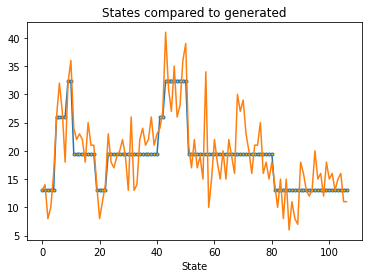

In [5]:
# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
ax.plot(earthquakes)
ax.set_title('States compared to generated')
ax.set_xlabel('State')


In [6]:
earthquakes[:, None].shape

(107, 1)

In [7]:
#Example with multivariate

In [8]:
from sklearn import datasets
import pandas as pd

# load iris dataset
iris = datasets.load_iris()

model = hmm.GaussianHMM(n_components=3,random_state=idx)
model.fit(iris['data'])

GaussianHMM(n_components=3, random_state=9)

In [9]:
states = model.predict(iris['data'])

In [10]:
states.shape

(150,)

In [11]:
#model.means_[states]

Text(0.5, 0, 'State')

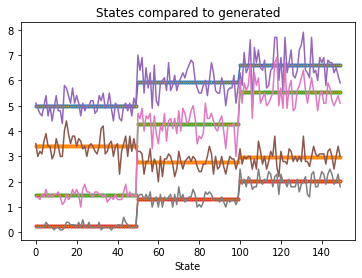

In [12]:
# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.means_[states], ".-", ms=6, mfc="orange")
ax.plot(iris['data'])
ax.set_title('States compared to generated')
ax.set_xlabel('State')


In [13]:
states

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
#ar = np.concatenate([np.random.normal(0,0.1,20),np.random.normal(5,1,20)], axis=0).reshape(20,2)

In [15]:
import statsmodels.api as sm
by = sm.datasets.get_rdataset('BondYield','AER')
#bond = (by.raw_data.value - by.raw_data.value.mean())/by.raw_data.value.std()
#np.array(by.raw_data.value.tolist()[0:20])
by.raw_data.loc[:,'diff'] = by.raw_data.value.diff()

In [17]:
#np.array(by.raw_data['diff'].tolist()[1:])[:,None]

In [18]:
model = hmm.GaussianHMM(n_components=3,random_state=1)
model.fit(np.array(by.raw_data['diff'].tolist()[1:]).reshape(-1,1))
model.startprob_=[0.25,0.4,0.35]
model.transmat_ = np.array([[0.5, 0.3, 0.2],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.2, 0.5]])
states = model.predict(np.array(by.raw_data['diff'].tolist()[1:])[:,None])

In [19]:
states

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

Text(0.5, 0, 'State')

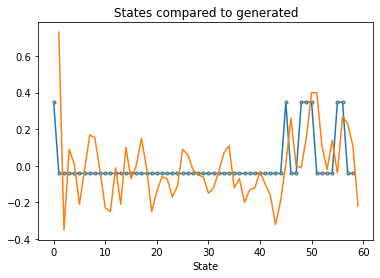

In [21]:
# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.means_[states], ".-", ms=6, mfc="orange")
ax.plot(np.array(by.raw_data['diff'].tolist())[:,None])
ax.set_title('States compared to generated')
ax.set_xlabel('State')

In [23]:
#model.means_[states]

In [30]:
model = hmm.PoissonHMM(n_components=3,random_state=1)
model.fit(np.array((by.raw_data.value*100).astype(int)).reshape(-1,1))
model.startprob_=[0.25,0.4,0.35]
model.transmat_ = np.array([[0.5, 0.3, 0.2],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.2, 0.5]])
states = model.predict(np.array((by.raw_data.value*100).astype(int)).reshape(-1,1))

In [31]:
states

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0])

Text(0.5, 0, 'State')

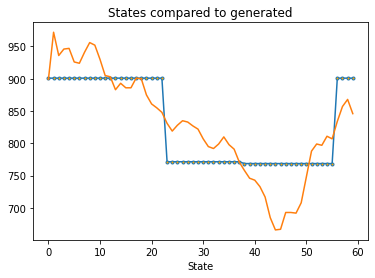

In [33]:
# plot model states over time
fig, ax = plt.subplots()
ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
ax.plot(np.array((by.raw_data.value*100).astype(int)).reshape(-1,1))
ax.set_title('States compared to generated')
ax.set_xlabel('State')